In [48]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import os
DATA_PATH = "../data"

In [50]:
# read data
train = pd.read_csv(os.path.join(DATA_PATH, 'drugs_train.csv'))
#test = pd.read_csv(os.path.join(DATA_PATH, 'drugs_test.csv'))
active_ing = pd.read_csv(os.path.join(DATA_PATH, 'active_ingredients.csv'))
#drug_label_feature_eng = pd.read_csv(os.path.join(DATA_PATH, 'drug_label_feature_eng.csv'))

In [65]:
train = pd.merge(train, active_ing, on='drug_id', how='inner')

In [66]:
print(train.shape)
train.head().T

(13881, 15)


,0,1,2,3,4
drug_id,0_train,1_train,1_train,2_train,3_train
description,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,plaquette(s) thermoformée(s) aluminium de 28 c...,plaquette(s) thermoformée(s) aluminium de 28 c...,plaquette(s) thermoformée(s) PVC-aluminium de ...,30 sachet(s)-dose(s) papier aluminium complexe...
administrative_status,Présentation active,Présentation active,Présentation active,Présentation active,Présentation active
marketing_status,Déclaration de commercialisation,Déclaration de commercialisation,Déclaration de commercialisation,Déclaration de commercialisation,Déclaration de commercialisation
approved_for_hospital_use,oui,oui,oui,oui,oui
reimbursement_rate,65%,65%,65%,65%,65%
dosage_form,comprimé pelliculé,comprimé à croquer,comprimé à croquer,gélule à libération prolongée,granulés à libération prolongée
route_of_administration,orale,orale,orale,orale,orale
marketing_authorization_status,Autorisation active,Autorisation active,Autorisation active,Autorisation active,Autorisation active
marketing_declaration_date,20140101,20130101,20130101,20000101,20050101


### Analysis
We will analyse the following:

1. The target variable
1. Variable types (categorical and numerical)
1. Missing data
1. Numerical variables
    * Discrete
    * Continuous
    * Distributions
    * Transformations
1. Categorical variables
    * Cardinality
    * Rare Labels
    * Special mappings

### Target

In [7]:
target = "price"

<AxesSubplot:xlabel='price', ylabel='Count'>

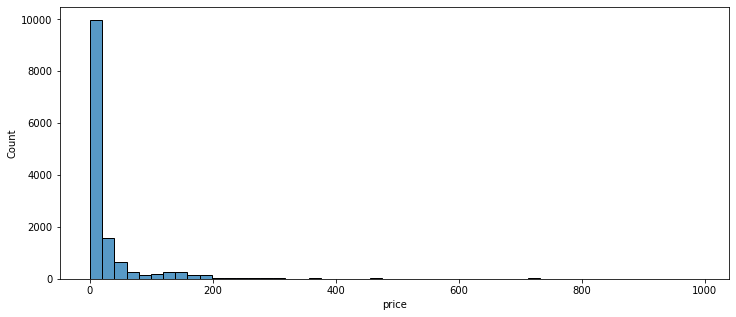

In [8]:
plt.figure(figsize=(12, 5))
sns.histplot(data=train, x="price", bins=50)

the target distribution is **skewed towards the right**.

<AxesSubplot:>

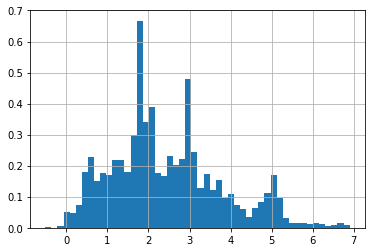

In [9]:
np.log(train['price']).hist(bins=50, density=True)


### vars categories

In [10]:
# lets identify categorical
cat_vars = [var for var in train.columns if train[var].dtype == 'O']
cat_vars

['drug_id',
 'description',
 'administrative_status',
 'marketing_status',
 'approved_for_hospital_use',
 'reimbursement_rate',
 'dosage_form',
 'route_of_administration',
 'marketing_authorization_status',
 'marketing_authorization_process',
 'pharmaceutical_companies',
 'active_ingredient']

In [11]:
train.dtypes

drug_id                             object
description                         object
administrative_status               object
marketing_status                    object
approved_for_hospital_use           object
reimbursement_rate                  object
dosage_form                         object
route_of_administration             object
marketing_authorization_status      object
marketing_declaration_date           int64
marketing_authorization_date         int64
marketing_authorization_process     object
pharmaceutical_companies            object
price                              float64
active_ingredient                   object
dtype: object

### Missing Values

In [12]:
len(train) - train.count()

drug_id                            0
description                        0
administrative_status              0
marketing_status                   0
approved_for_hospital_use          0
reimbursement_rate                 0
dosage_form                        0
route_of_administration            0
marketing_authorization_status     0
marketing_declaration_date         0
marketing_authorization_date       0
marketing_authorization_process    0
pharmaceutical_companies           0
price                              0
active_ingredient                  0
dtype: int64

=> No missing values!!


### Date variables

Lets transform the features dates to datetime type (but lets pay attention to the format)
* marketing_declaration_date
* marketing_authorization_date

In [13]:
len(train) - train['marketing_declaration_date'].astype(str).apply(lambda x : x.endswith('0101')).sum()

0

In [14]:
len(train) - train['marketing_authorization_date'].astype(str).apply(lambda x : x.endswith('0101')).sum()

0

In [15]:
train['marketing_declaration_date'] = pd.to_datetime(train['marketing_declaration_date'], format="%Y%m%d")
train['marketing_authorization_date'] = pd.to_datetime(train['marketing_authorization_date'], format="%Y%m%d")

In [16]:
train['marketing_declaration_date'] - train['marketing_authorization_date']

0          0 days
1       1461 days
2       1461 days
3       1461 days
4        366 days
           ...   
13876   2192 days
13877   2192 days
13878   2922 days
13879      0 days
13880      0 days
Length: 13881, dtype: timedelta64[ns]

We can explore the evolution of the sale price across the dates at which the drug has been authorized

Text(0, 0.5, 'Median drug Price')

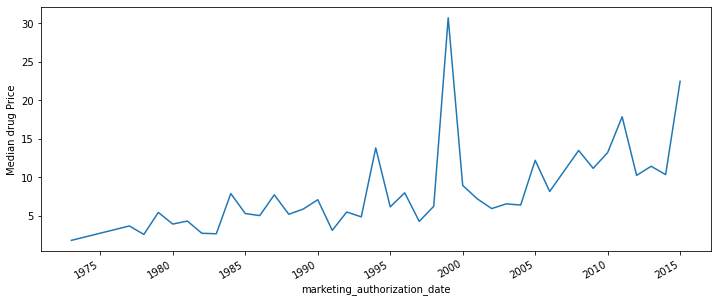

In [17]:
plt.figure(figsize=(12, 5))
train.groupby('marketing_authorization_date')[target].median().plot()

plt.ylabel('Median drug Price')

=> We can see that the general trend of the price is inscreasing through time (PS there is a price sales peak in year 1999 )

In [49]:
train['marketing_declaration_date']

0       2014-01-01
1       2013-01-01
2       2013-01-01
3       2000-01-01
4       2005-01-01
           ...    
13876   2014-01-01
13877   2014-01-01
13878   2009-01-01
13879   2007-01-01
13880   2007-01-01
Name: marketing_declaration_date, Length: 13881, dtype: datetime64[ns]

In [36]:
train.head()

,drug_id,description,administrative_status,marketing_status,approved_for_hospital_use,reimbursement_rate,dosage_form,route_of_administration,marketing_authorization_status,marketing_declaration_date,marketing_authorization_date,marketing_authorization_process,pharmaceutical_companies,price,active_ingredient
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,2014-01-01,2014-01-01,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),2.83,DÉSOGESTREL
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,2013-01-01,2009-01-01,Procédure de reconnaissance mutuelle,TEVA SANTE,14.30,MONTÉLUKAST ACIDE
2,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,2013-01-01,2009-01-01,Procédure de reconnaissance mutuelle,TEVA SANTE,14.30,MONTÉLUKAST SODIQUE
3,2_train,plaquette(s) thermoformée(s) PVC-aluminium de ...,Présentation active,Déclaration de commercialisation,oui,65%,gélule à libération prolongée,orale,Autorisation active,2000-01-01,1996-01-01,Procédure nationale,MYLAN SAS,5.66,CHLORHYDRATE DE DILTIAZEM
4,3_train,30 sachet(s)-dose(s) papier aluminium complexe...,Présentation active,Déclaration de commercialisation,oui,65%,granulés à libération prolongée,orale,Autorisation active,2005-01-01,2004-01-01,Procédure nationale,SANOFI AVENTIS FRANCE,24.27,ACIDE VALPROÏQUE


####  Discrete variables
we ll select discrete variables that have finite modalities

In [87]:
descrete_vars = [var for var in train.columns if train[var].dtype=='object' and train[var].nunique()<20]

In [88]:
descrete_vars

['administrative_status',
 'marketing_status',
 'approved_for_hospital_use',
 'reimbursement_rate',
 'marketing_authorization_status',
 'marketing_authorization_process']

<Figure size 3600x360 with 0 Axes>

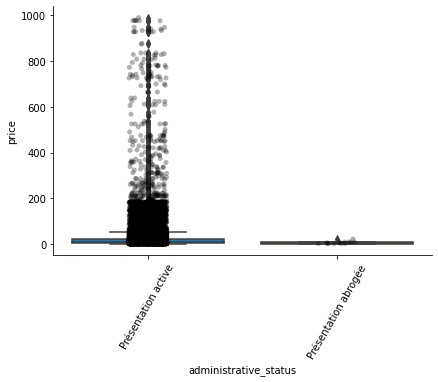

<Figure size 3600x360 with 0 Axes>

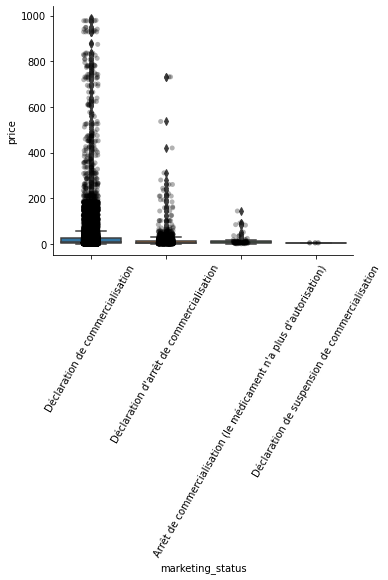

<Figure size 3600x360 with 0 Axes>

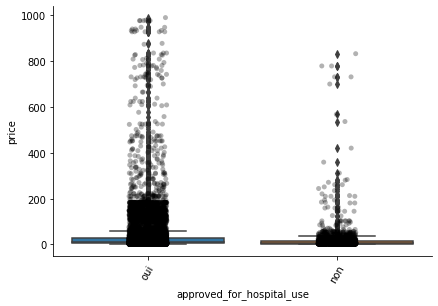

<Figure size 3600x360 with 0 Axes>

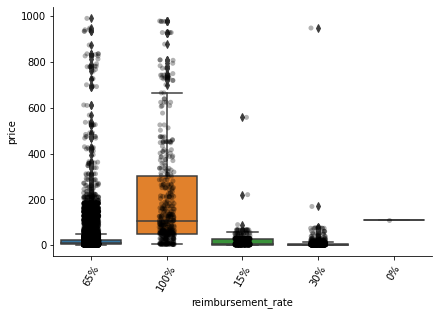

<Figure size 3600x360 with 0 Axes>

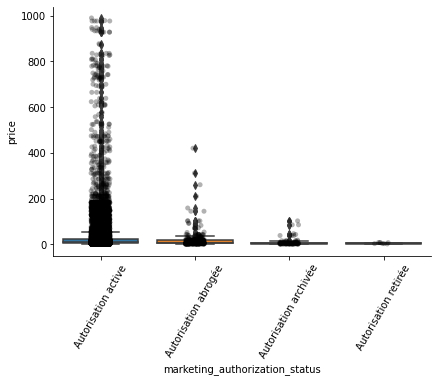

<Figure size 3600x360 with 0 Axes>

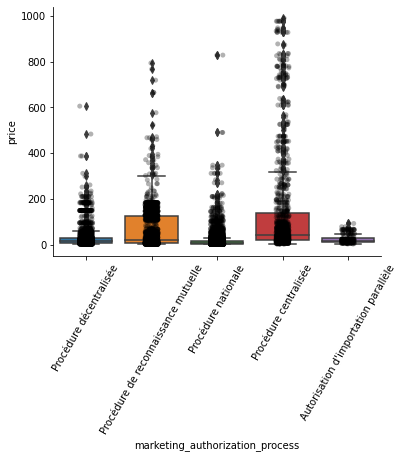

In [90]:

for var in descrete_vars: 
    plt.figure(figsize=(50, 5))
    # make boxplot with Catplot
    sns.catplot(x=var, y=target, data=train, kind="box", height=4, aspect=1.5)
    plt.xticks(rotation=60)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y=target, data=train, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most discrete variables, we see an increase in the sale price, with the accessibility (administratively or the fact that it is marketed or not, or whether it is approved for hospital use or not)
We can also notice that the reimbursment rate is a petty discriminative feature

In [73]:

train['pharmaceutical_companies'].value_counts().describe()

count     325.000000
mean       42.710769
std       126.629317
min         1.000000
25%         2.000000
50%         8.000000
75%        23.000000
max      1172.000000
Name: pharmaceutical_companies, dtype: float64

In [77]:
train['marketing_authorization_process'].unique()

2189

In [ ]:
discrete_vars = ['administrative_status', 'marketing_status']
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]